# 데이터 준비하기 & 형태소 분석

In [1]:
import pandas as pd

def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

path = '/Users/jsha/gjai/nlp/pytest/'
file = '감성대화말뭉치(최종데이터)_Training.xlsx'

df = pd.read_excel(path+file)

In [2]:
df = df[['성별', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]
df.head()

,성별,사람문장1,사람문장2,사람문장3,사람문장4
0,남성,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,NaN
1,남성,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,NaN
2,여성,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.
3,남성,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,회사생활을 열심히 해서 계속 월급을 받을거야!,NaN
4,여성,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,NaN,NaN


In [3]:
df = df.fillna('')
df.isnull().sum()

성별       0
사람문장1    0
사람문장2    0
사람문장3    0
사람문장4    0
dtype: int64

In [4]:
data = df.iloc[:,1:].to_numpy()
data = [' '.join(ar) for ar in data]


In [5]:
data[3]


'재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해. 퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 수 있어서 너무 행복해. 회사생활을 열심히 해서 계속 월급을 받을거야! '

In [6]:
from tqdm import tqdm
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = []
for data_each in tqdm(data):
    morphed_data_each = rhinoMorph.onlyMorph_list(rn, 
                        data_each, pos=['NNG', 'NNP', 'VV',
                        'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each:
        morphed_data.append(joined_data_each)


filepath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages
classpath:  /Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
RHINO started!


100%|██████████| 40879/40879 [00:45<00:00, 902.27it/s] 


# 데이터 불러오기 & 전처리

In [7]:
data = morphed_data
print(len(data))
print(data[0])

40879
아내 드디어 출산 되 정말 신 나 아 지금 정말 신 나 아기 점점 크 벌써 기대 되 많이 놀


## train - test 데이터 분리하기

In [8]:
data_text = data
data_gender = df['성별'].to_list()

from sklearn.model_selection import train_test_split

train_data_text, test_data_text, train_data_gender, test_data_gender = \
train_test_split(data_text, data_gender, stratify=data_gender, random_state=11)

In [9]:
from collections import Counter
train_data_gender_freq = Counter(train_data_gender)
print('train_data_gender_freq:', train_data_gender_freq)

test_data_gender_freq = Counter(test_data_gender)
print('test_data_gender_freq:', test_data_gender_freq)


train_data_gender_freq: Counter({'여성': 17039, '남성': 13620})
test_data_gender_freq: Counter({'여성': 5680, '남성': 4540})


## 텍스트 길이 통계 분석하기

In [10]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data_text]

print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.mean(text_len))
print('중위수길이:', np.median(text_len))
print('percentile 범위', [0, 25, 50, 75, 90, 100])
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])


최소길이: 4
최대길이: 74
평균길이: 22.043152092370917
중위수길이: 22.0
percentile 범위 [0, 25, 50, 75, 90, 100]
구간별 최대 길이: [ 4. 17. 22. 27. 31. 74.]
최소길이 문장: 따돌림 힘들 친구 따돌리
최대길이 문장: 어제 아들 무슨 잘못 하 야단 좀 치 글쎄 말 엄마 하 줄 있 기가 막히 애 뒷바라지 하 얼마나 고생 하 아들 그림 좀 잘 그리 편 한데 내가 미대 절대 안 되 그림 도구 같 다 버리 근데 부모 되 자식 진로 대하 결정 하 있 애가 공부 시간 없 틈 나 붓 잡 있 화 나 그리하 아들 좀 미안 하 마음 있 한데 그렇 부모 그렇게 말 하 더 나쁘


# 1단계 - Tokenizing
- 특정 단어에 인덱싱을 부여하는 작업
- 최대 몇개의 인덱싱을 부여할지는 num_words 옵션으로 선택
- 3단계 원-핫 인코딩 때 num_words를 쓸건데, 이걸 쓸려면 최소 이 수만큼 인덱싱은 부여되어야 한다.

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 10000
maxlen = 30

tokenizer = Tokenizer(num_words=max_words) # 10000개 컬럼의 틀을 갖는 토크나이저 생성
tokenizer.fit_on_texts(train_data_text) # train_data_text 전체에 대하여 빈도수에 따라 단어를 인덱싱하는 작업. 모든 단어 수가 600000개면 인덱싱도 이 수만큼 일어난다.
word_index = tokenizer.word_index #인덱싱 번호를 출력해 보면 22136이 나온다.

Using TensorFlow backend.


In [12]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type:', type(word_index))
print('word_index:', word_index)
# 주목할 것은 word_index가 1부터 시작한다는 거다. 0은?? 이건 나중에 padding을 위해 사용된다.

전체에서 12625개의 고유한 토큰을 찾았습니다.
word_index type: <class 'dict'>
word_index: {'하': 1, '친구': 2, '같': 3, '되': 4, '너무': 5, '있': 6, '없': 7, '좋': 8, '안': 9, '사람': 10, '말': 11, '받': 12, '가': 13, '더': 14, '잘': 15, '일': 16, '모르': 17, '보': 18, '생각': 19, '이야기': 20, '돈': 21, '정말': 22, '걱정': 23, '나': 24, '힘들': 25, '마음': 26, '많이': 27, '들': 28, '회사': 29, '때': 30, '다': 31, '아내': 32, '응': 33, '못': 34, '알': 35, '이제': 36, '기분': 37, '오': 38, '남편': 39, '오늘': 40, '어떻하': 41, '그': 42, '건강': 43, '많': 44, '요즘': 45, '좀': 46, '지금': 47, '집': 48, '살': 49, '다른': 50, '결혼': 51, '이번': 52, '부모': 53, '못하': 54, '가족': 55, '준비': 56, '열심히': 57, '맞': 58, '엄마': 59, '먹': 60, '아프': 61, '화': 62, '아들': 63, '나오': 64, '슬프': 65, '자식': 66, '왜': 67, '만나': 68, '앞': 69, '시간': 70, '다니': 71, '나이': 72, '공부': 73, '혼자': 74, '직장': 75, '같이': 76, '아이': 77, '생각하': 78, '불안': 79, '이': 80, '학교': 81, '대하': 82, '계속': 83, '주': 84, '고민': 85, '대화': 86, '아직': 87, '크': 88, '듣': 89, '남자': 90, '사': 91, '속상하': 92, '병원': 93, '자꾸': 94, '한': 95, '당황': 96, '취업': 97, 

In [13]:
data = tokenizer.texts_to_sequences(train_data_text) # train data에 Tokenizer 적용
# 이제야 토크나이저 maxlen의 10000의 1이 적은 9999이 적용된다. indexing한 결과를 바탕으로 상위 9999개만 가져온다.
# 1 적은 이유는 이 1이 나중 원핫인코딩의 10000개 컬럼 중 0번째, 패딩 자리가 될터이다. 
# 그리고 각 데이터의 문자를 보고 해당 수를 넣는다.
# 만약 인덱싱 9999안에 속하지 않은 문자는 그냥 제거한다.

print('data 0:', data[0])
print('texts 0:', train_data_text[0])

data 0: [52, 2142, 2744, 213, 46, 702, 126, 31, 5437, 2090, 313, 95, 684, 7182, 2090, 133, 7182, 2090, 74, 46, 220, 3]
texts 0: 이번 인턴 뽑히 그런데 좀 열등감 느끼 다 석사 출신 동기 한 명 학사 출신 그래도 학사 출신 혼자 좀 다행 같


# padding
- 모든 문장의 길이를 맞추기 위한 과정.
- 패딩에서 문장 길이를 맞추고 원핫인코딩을 하는데, 원핫인코딩에서 max_words를 10000개로 늘리기 때문에 이 과정이 크게 의미가 없는 것이다.
- 실은 여기에서는 굳이 필요한 작업은 아닌데, 나중 RNN에서는 필요하다.


In [14]:
data = pad_sequences(data, maxlen=maxlen) 
# 우리는 maxlen은 20으로 줬기 때문에, 이보다 크면 뒤를 잘라내고, 작으면 앞에서부터 0을 패딩으로 넣고, 중요한 단어는 뒤로 보낸다.
# padding = 'pre'가 기본값. 'post'로 하면 뒤에 0을 채운다.
# truncating = 'pre' 가 기본값. 'post'를 하면 maxlen을 넘는 경우 문장의 뒤를 자른다.
print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ...   46  220    3]
 [   0    0    0 ...  380 1910  380]
 [   0    0    0 ...   31 2388  398]
 ...
 [   0    0    0 ...  116  312    8]
 [   0    0    0 ...  297  810  140]
 [   0    0    0 ...   58   74   49]]
data 0: [   0    0    0    0    0    0    0    0   52 2142 2744  213   46  702
  126   31 5437 2090  313   95  684 7182 2090  133 7182 2090   74   46
  220    3]
data 0의 길이: 30


In [15]:
# pad_sequences()를 거치게 되면, type이 ndarray로 바뀐다.
print(type(train_data_text))
print(type(data))
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(30659, 30)


# One-Hot Encoding
- 원핫인코딩을 하고나면, 문장의 어순 정보가 소실된다.
    - 그러나 RNN에서는 어순 정보를 살린다. 단어의 발생 순서를 고려한다.
    - 처음엔 어순이 중요치 않다고 생각했다. bag of words.
    - 요즘엔 transformer가 핫한데, 이건 단어의 발생순서보다 단어의 중요도, attention에 더 주목한다.
- 또 한가지 더. 빈도수 정보가 사라진다.

- 원-핫 인코딩의 특징: 0을 활용한다는 점. 이게 신경망의 입력층으로 들어가면 초기 가중치와 곱해져서 다음 층으로 전달되는데, 입력층에서 노드가 0으로 설정되면 이 단어의 영향력은 없고 다음층으로 전달되지 않는다. 이게 참 멋지다.
- 언제 원핫 인코딩을 쓰는가? 수치가 이닌 카테고리컬 특징을 컴터가 연산을 할 수 있도록 도와준다. 그 특징의 내용이 모델에서 영향을 주면 1, 아니면 0으로 설정된다.


## One-Hot Encoding

In [16]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_gender)
train_data_gender2 = le.transform(train_data_gender)
print(train_data_gender[:5])
print(train_data_gender2[:5])

data = to_one_hot(data, dimension=max_words)
labels = np.asarray(train_data_gender2).astype('float32')

['여성', '여성', '여성', '남성', '남성']
[1 1 1 0 0]


In [17]:
print(type(train_data_text))
print(type(data))
print(data.shape)

print('데이터 텐서의 차원:', data.ndim)
print('레이블 텐서의 차원:', labels.ndim)

print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(30659, 10000)
데이터 텐서의 차원: 2
레이블 텐서의 차원: 1
데이터 텐서의 크기: (30659, 10000)
레이블 텐서의 크기: (30659,)


# 모델 설계

## 훈련데이터, 훈련데이터에서의 검증데이터, 테스트데이터
- 검증데이터
    - 훈련 시 각 에포크가 끝날때마다 모델의 성능을 테스트 하는 데이터
    - 에포크가 진행되면서 모델의 성능이 좋아질수도 낮아질수도 있는데 그때마다 검증용으로 사용됨.
    - keras 모델 만들 때 설정할 수 있었던 것 같은데.
- 테스트데이터
    - 모든 훈련이 끝나고 선택된 최종 모델에 대해 성능을 검증하는 데이터
    - 함수 train_test_split() 이용해서 분리. 특히 분류에서는 stratify 옵션을 사용함.
    

In [18]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)

x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]

print(len(x_train))
print(len(x_val))

21462
9197


In [33]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(1028, activation='relu', input_shape=(max_words,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1028)              10281028  
_________________________________________________________________
dense_27 (Dense)             (None, 128)               131712    
_________________________________________________________________
dense_28 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 10,416,901
Trainable params: 10,416,901
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=5, batch_size=1000,
                    validation_data=(x_val, y_val))
history_dict = history.history

Train on 21462 samples, validate on 9197 samples
Epoch 1/5
21462/21462 [==============================] - 9s 425us/step - loss: 0.6552 - acc: 0.5992 - val_loss: 0.6160 - val_acc: 0.6522
Epoch 2/5
21462/21462 [==============================] - 9s 411us/step - loss: 0.4731 - acc: 0.7702 - val_loss: 0.6451 - val_acc: 0.6618
Epoch 3/5
21462/21462 [==============================] - 9s 409us/step - loss: 0.2685 - acc: 0.8942 - val_loss: 0.7949 - val_acc: 0.6468
Epoch 4/5
21462/21462 [==============================] - 9s 414us/step - loss: 0.0907 - acc: 0.9763 - val_loss: 1.0364 - val_acc: 0.6540
Epoch 5/5
21462/21462 [==============================] - 9s 413us/step - loss: 0.0259 - acc: 0.9949 - val_loss: 1.2525 - val_acc: 0.6620


In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Train accuracy of each epoch:', np.round(acc,3))
print('Validation accuracy of each epoch:', np.round(val_acc,3))

Train accuracy of each epoch: [0.622 0.809 0.949 0.993 0.999 1.    1.    1.    1.    1.   ]
Validation accuracy of each epoch: [0.647 0.659 0.656 0.662 0.663 0.653 0.661 0.667 0.666 0.666]


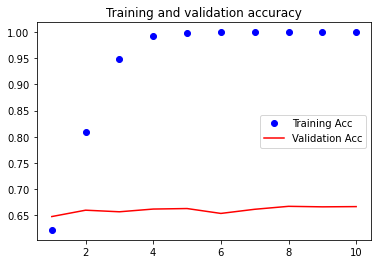

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

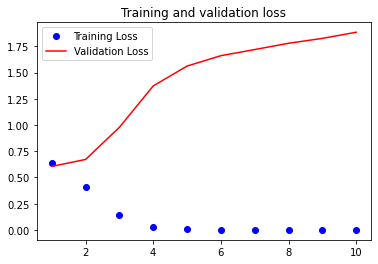

In [36]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 주의사항
- 1. 여기서 주어진 epoch에서 최고의 성능을 내는 parameter의 모델을 찾아.
    - validation data에서 최고의 성능을 내는 epoch 수를 확인하고 다시 모델을 돌려야 해.
    - 그리고 나서 저장을 한다. 하지만 일단 여기서는 생략하고 지금 이 모델을 저장하겠다.
- 2. 다른 방법: checkpointer
    - keras의 checkpointer를 사용하면, 쉽게 최적의 모델이 베스트 모델이라 가정하고 저장해 준다.
    - 저장된 모델 중 가장 마지막 번호를 찾으면 된다.
    - 아래 코드를 참조

In [22]:
# model.compile(loss='binary_crossentropy', optimizer='adam',
#              metrics=['acc'])

# modelpath = save_path+'{epoch:d}-{val_loss:.4f}.h5'
# # modelpath = save_path+'my_model.h5'

# from keras.callbacks import ModelCheckpoint
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
#                               verbose=1, save_best_only=True)
# model.fit(X_train, y_train, epochs=100, batch_size=5,
#          validation_split=0.2, verbose=1, callbacks=[checkpointer])

In [39]:
import os

save_path = '/Users/jsha/gjai/nlp/pytest/temp_binary_model/'
if not os.path.exists(save_path):
    os.makedirs(save_path)

model.save(save_path+'12_연습문제2.h5')

import pickle
with open(save_path+'12_연습문제2_text_binary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(save_path+'12_연습문제2_LabelEncoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 테스트 데이터로 모델 테스트하기

In [40]:
import os
from keras.models import load_model

save_path = '/Users/jsha/gjai/nlp/pytest/temp_binary_model/'

loaded_model = load_model(save_path+'12_연습문제2.h5')
print('model loaded:', loaded_model)

with open(save_path+'12_연습문제2_text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
    
with open(save_path+'12_연습문제2_LabelEncoder.pickle', 'rb') as handle:
    loaded_le = pickle.load(handle)


model loaded: <keras.engine.sequential.Sequential object at 0x7fb1d143e5d0>


In [26]:
# print(test_data_text)
# print(test_data_senti)

### 원-핫 인코딩을 하면서 소실되는 것 2가지는 무엇일까?
- 어순 정보: 단어에 할당되는 번호는 빈도에 의해 결정되는데, 원-핫 인코딩은 이 빈도 순에 따라 열번호를 나열한다. 그러나 실제 문장의 어순은 이 번호를 따르지 않기 때문에 원-핫 인코딩에서는 어순을 표현할 수 없다.
- 빈도 정보: 각 문장에서 등장하는 단어가 원-핫 인코딩의 컬럼 정보에 맞추어 등장하면 1, 등장하지 않으면 0으로 표현한다. 빈도수를 표현하는 다른 수단이 없다. 원-핫 인코딩에서는 등장 유무에 따라 0과 1로만 표현하기 때문이다.

### 불러온 tokenizer를 가지고 fit_on_texts(test_data_text)를 하면 안되는 이유는?
- fit_on_texts() 함수는 들어오는 문장에 대해 단어 빈도에 따라 단어에 인덱싱을 할당하는 역할을 한다. 즉, 불러온 tokenizer를 세팅하는 절차인데, 이 절차는 이미 train_data_text로 진행했고, tokenizer의 세팅이 끝났다.
- 여기에서 다시 fit_on_texts()를 하면 tokenizer가 다시 세팅되기 때문에(새로운 DTM header가 세팅되기 때문에) 이전에 세팅된 tokenizer를 이용하고 이 과정이 포함된 model을 테스트 하는 것이 의미가 없어진다.
- 즉, train_data_text와 test_data_text를 동일한 세팅의 tokenizer를 사용해야 한다.

In [43]:
data = loaded_tokenizer.texts_to_sequences(test_data_text)

In [44]:
data = pad_sequences(data, maxlen=maxlen)

In [45]:
x_test = to_one_hot(data, dimension=max_words)

In [48]:
test_data_gender2 = loaded_le.transform(test_data_gender)
print(test_data_gender[:5])
print(test_data_gender2[:5])

y_test = np.asarray(test_data_gender2).astype('float32')


['여성', '남성', '남성', '여성', '여성']
[1 0 0 1 1]


In [49]:
test_eval = loaded_model.evaluate(x_test, y_test)

10220/10220 [==============================] - 3s 274us/step


In [54]:
print('prediction model loss:', format(test_eval[0], '.3f'))
print('prediction model acc:', format(test_eval[1], '.3f'))

prediction model loss: 1.241
prediction model acc: 0.662
